# 10-6 精准率和召回率曲线 

学习目标：

+ 从图1中的两根线找到超参数
+ 图2 pr 曲线中找到急剧下降的那个地方
+ 图2 pr 曲线更靠外的模型更好
+ roc曲线

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 在我的 notebook 里，要设置下面两行才能显示中文
plt.rcParams['font.family'] = ['sans-serif']
# 如果是在 PyCharm 里，只要下面一行，上面的一行可以删除
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [10]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target == 9] = 1
y[digits.target < 9] = 0

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [12]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
decision_scores = log_reg.decision_function(X_test)
decision_scores[:10]

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([-22.05700176, -33.02942177, -16.21334795, -80.37912802,
       -48.25123157, -24.5400517 , -44.39164685, -25.04292866,
        -0.97828561, -19.71741965])

下面画出精准率召回率曲线。

In [13]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precisions = []
recalls = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
for threshold in thresholds:
    y_predict = np.array(decision_scores > threshold, dtype='int')
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))

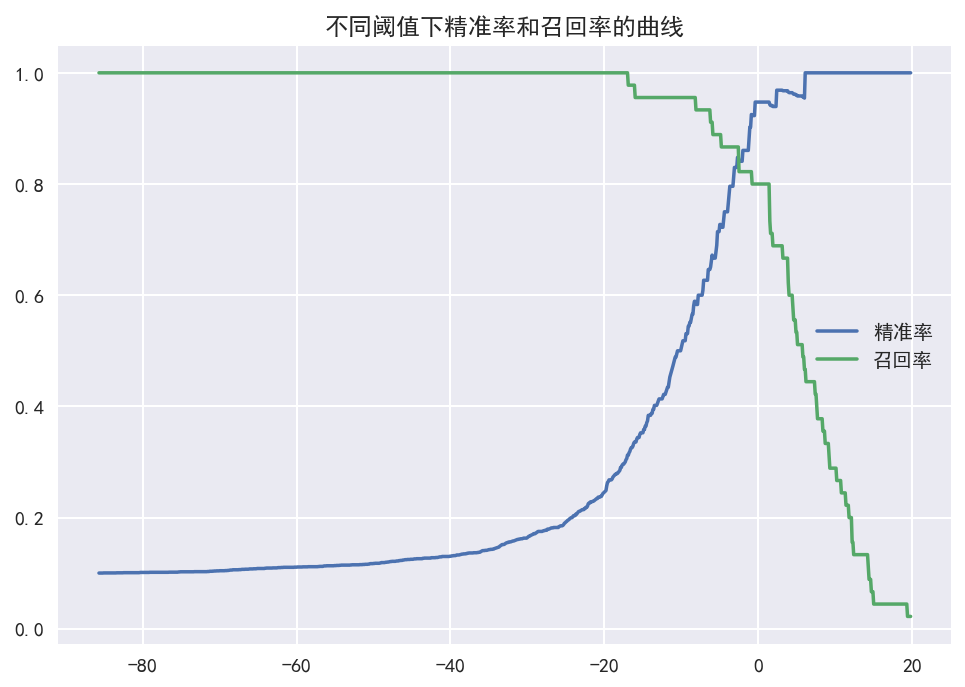

In [14]:
plt.plot(thresholds, precisions, label='精准率')
plt.plot(thresholds, recalls, label='召回率')
plt.legend(loc='best')
plt.title('不同阈值下精准率和召回率的曲线')
plt.show()

## 精准度-召回率（Precision-Recall）曲线

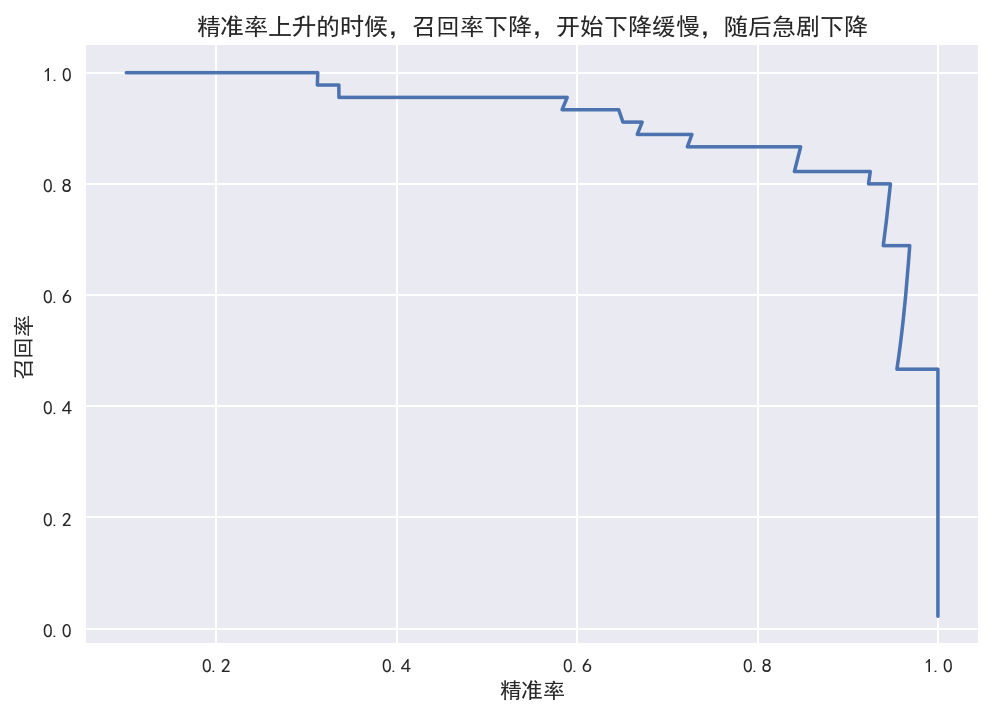

In [15]:
plt.plot(precisions, recalls)
plt.xlabel('精准率')
plt.ylabel('召回率')
plt.title('精准率上升的时候，召回率下降，开始下降缓慢，随后急剧下降')
plt.show()

## scikit-learn 中的 Precision-Recall 曲线

注意：precision_recall_curve 的第 2 个参数是 decision_scores。

In [16]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(
    y_test, decision_scores)

In [17]:
precisions.shape, recalls.shape, thresholds.shape

((145,), (145,), (144,))

+ thresholds 的 shape 比 precisions 和 recalls 少 1，原因可以看官网。

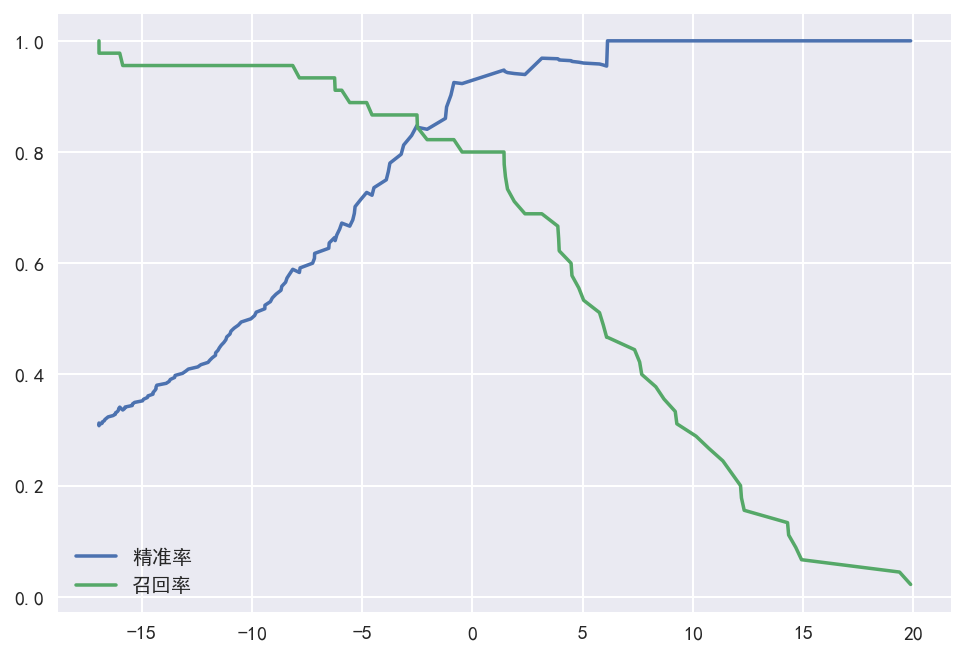

In [18]:
plt.plot(thresholds, precisions[:-1], label='精准率')
plt.plot(thresholds, recalls[:-1], label='召回率')
plt.legend()
plt.show()

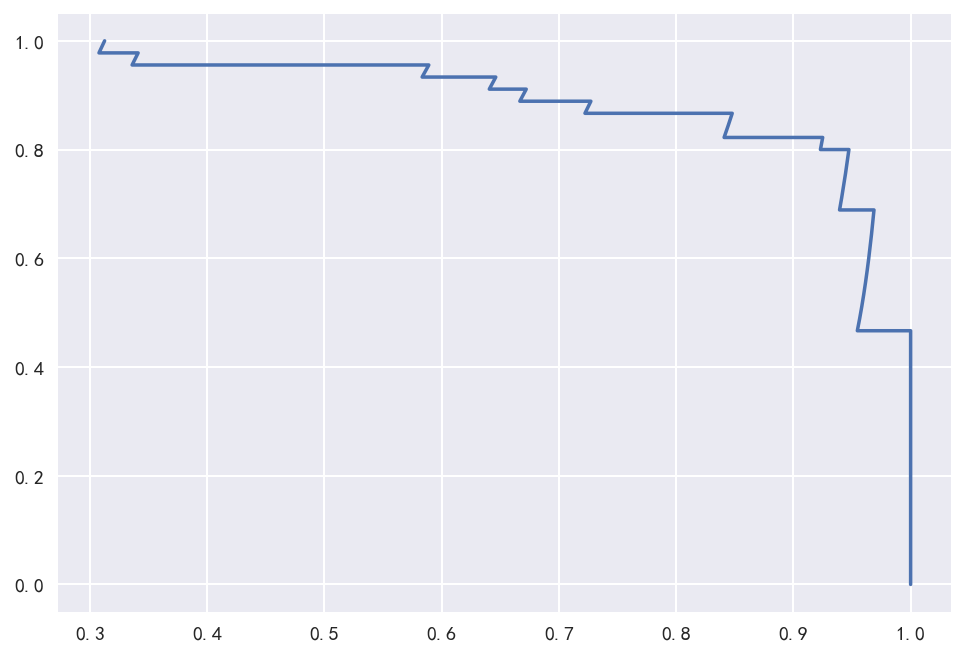

In [19]:
plt.plot(precisions, recalls)
plt.show()

混淆矩阵：

|       | 预测值：0 | 预测值：1 |
| :---: | :---: | :---: |
| 真实值：0 |  TN   |  FP   |
| 真实值：1 |  FN   |  TP   |

结论：精准率上升的时候，召回率就下降。从混淆矩阵中也不难理解这个规律。FP 越来越少的时候，精准率就上升了，此时 FN 就增加了，召回率就降低。

如何理解 FP 越来越少，即错误预测关注的比例越来越少，这正是之前所说的阈值提高的过程。